# Logistic Regression
. Data Preparation
. Visualization
. Create train and test data
. Create logistic regression model
. Prediction
. Decision Boundary
. Sklearn implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Data Preparation (Numpy)

In [3]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


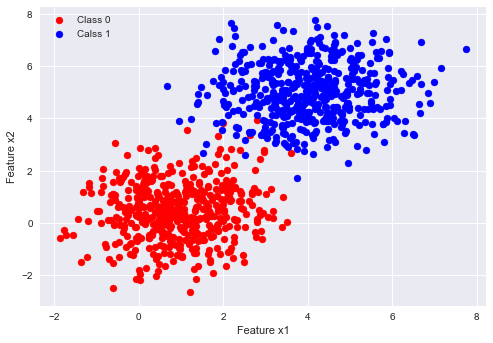

In [4]:
plt.style.use('seaborn')
plt.scatter(dist_01[:,0], dist_01[:,1], color='red', label="Class 0")
plt.scatter(dist_02[:,0], dist_02[:,1], color='blue', label="Calss 1")
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.show()

In [5]:
data = np.zeros((1000,3))
data.shape

(1000, 3)

In [6]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [7]:
#randomly shuffle the data
np.random.shuffle(data)

In [8]:
#divide the data in train test
split = int(0.8*data.shape[0])
X_train = data[:split, :2]
X_test = data[split:, :2]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [9]:
#plot the training data and normalize it

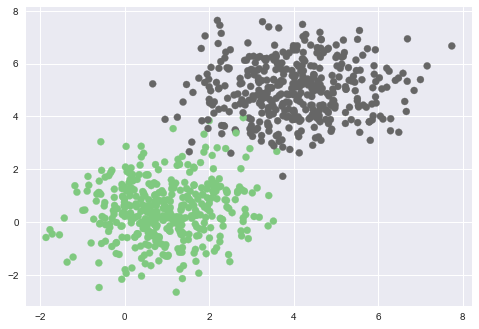

In [10]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.Accent)
plt.show()

In [11]:
#Data Normalization
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
print(X_mean, X_std)

[2.46027913 2.7359041 ] [1.8921399  2.51337583]


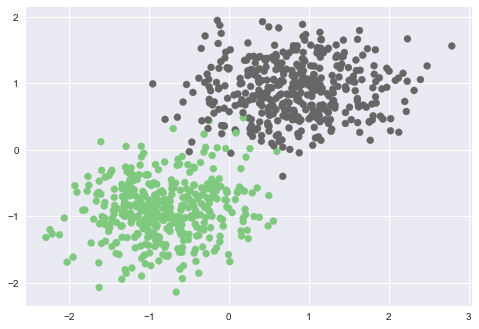

In [12]:
#Apply Trasnsformation
X_train = (X_train-X_mean)/X_std

#Apply the same for test data 
X_test = (X_test-X_mean)/X_std

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.Accent)
plt.show()

## Logistic Regression Algo

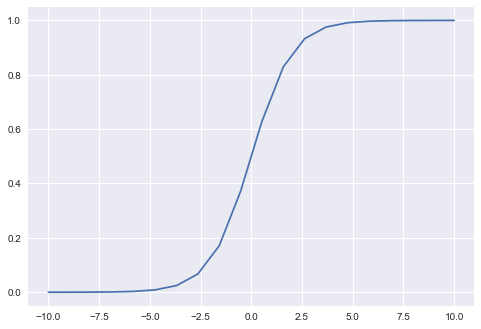

In [13]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

a = np.linspace(-10,10,20)
plt.plot(a, sigmoid(a))
plt.show()

In [14]:
def Hypothesis(x, theta):
    #x-> (m,n+1)
    #theta -> (n+1,1)
    
    return sigmoid(np.dot(x,theta))

def Costfun(x,y,theta):
    #x -> (m,n+1)
    #theta -> (n+1,1)
    #y -> (m,1)
    
    hi = Hypothesis(x,theta)
    error = -1*np.mean((y*np.log(hi) + (1-y)*np.log(1-hi)))
    
    return error

def gradient(x,y,theta):
    hi = Hypothesis(x,theta)
    grad = np.dot(x.T, (y-hi))
    m = x.shape[0]
    return grad/m

def Gradient_descent(x,y,lr=0.1,num_it=500):
    n = x.shape[1]
    theta = np.zeros((n,1))
    
    error_list = []
    for i in range(num_it):
        err = Costfun(x,y,theta)
        error_list.append(err)
        
        grad = gradient(x,y,theta)
        
        #update
        theta = theta + lr*grad
        
    return (theta, error_list)    

In [15]:
ones = np.ones((X_train.shape[0],1))
X_New_train = np.hstack((ones, X_train))
print(X_New_train.shape)
print(X_New_train)
Y_train = Y_train.reshape((-1,1))

(800, 3)
[[ 1.         -0.99444671 -0.95088969]
 [ 1.          0.67534496 -0.39900477]
 [ 1.         -0.94420583 -0.93168624]
 ...
 [ 1.         -0.02376157 -0.86014507]
 [ 1.          1.24681549  1.52786039]
 [ 1.          0.1975339   1.34725874]]


In [16]:
theta, error_list = Gradient_descent(X_New_train, Y_train)

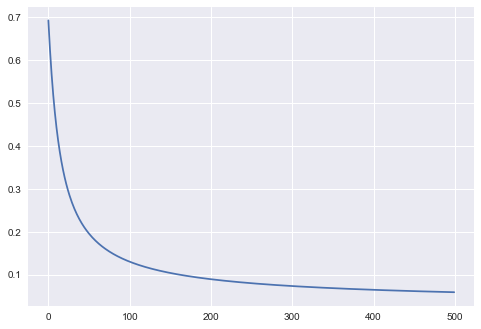

In [17]:
plt.plot(error_list)

In [18]:
theta

array([[-0.0099269 ],
       [ 2.04863269],
       [ 2.93523154]])

## Visualize decision boundary

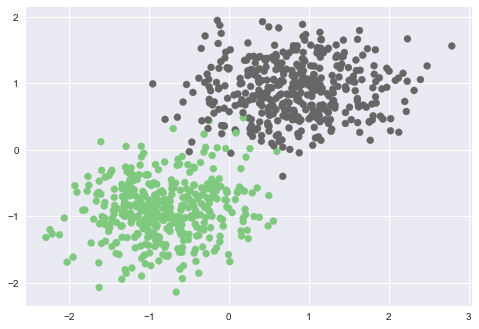

In [20]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train.reshape((-1,)), cmap=plt.cm.Accent)
plt.show()

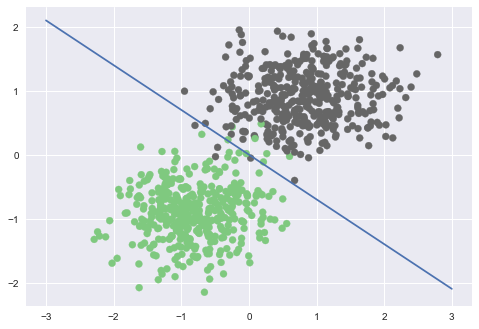

In [28]:
x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]

plt.scatter(X_train[:,0], X_train[:,1], c=Y_train.reshape((-1,)), cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()

## Prediction and Accuracy

In [32]:
def predict(x, theta):
    h = Hypothesis(x, theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    return output

X_train_pred = predict(X_New_train, theta)
X_train_pred[:10,]

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [35]:
X_New_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))
print(X_New_test.shape)

(200, 3)


In [36]:
X_test_pred = predict(X_New_test, theta)
X_test_pred[:20,]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]])

In [37]:
print(X_train_pred.shape, X_test_pred.shape)

(800, 1) (200, 1)


In [42]:
def Accuracy(actual, pred):
    actual = actual.astype('int')
    acc = np.sum(actual == pred)/actual.shape[0]
    return acc*100

In [43]:
Accuracy(Y_train, X_train_pred)

98.625

In [48]:
Y_test = Y_test.reshape((-1,1))

In [49]:
Y_test.shape

(200, 1)

In [50]:
Accuracy(Y_test, X_test_pred)

99.5

# Sklearn implementation

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()

In [58]:
model.fit(X_train, Y_train)

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [59]:
theta_0 = model.intercept_
theta_s = model.coef_

In [60]:
print(theta_0, theta_s)

[-0.12620809] [[2.42621019 4.5330616 ]]


In [61]:
model.score(X_train, Y_train)

0.9875

In [62]:
model.score(X_test, Y_test)

0.995

In [64]:
y_pred_train = model.predict(X_train)
print(y_pred_train.shape)

(800,)


In [67]:
y_pred_test = model.predict(X_test)
print(y_pred_test.shape)

(200,)


In [68]:
y_pred_train[8]

0.0

In [69]:
Y_train[8]

array([0.])

In [76]:
Y_train[1]

array([1.])

In [77]:
y_pred_train[1]

0.0